# Resolvendo um problema de classificação
## Breast Cancer Wisconsin (Original) Dataset
Retirado de https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

### 1 - Carregar uma base de dados de classificação

In [1]:
import pandas as pd
df = pd.read_excel('breast_cancer_wisconsin.xlsx', header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Dar drop da coluna 6 porque ela contém alguns valores faltantes
df.drop(columns=6, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       699 non-null    int64
 1   1       699 non-null    int64
 2   2       699 non-null    int64
 3   3       699 non-null    int64
 4   4       699 non-null    int64
 5   5       699 non-null    int64
 6   7       699 non-null    int64
 7   8       699 non-null    int64
 8   9       699 non-null    int64
 9   10      699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [5]:
X = df.iloc[:,1:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
y = (y > 3).astype(int)

In [6]:
X.shape, y.shape

((699, 8), (699,))

### 2 - Treinar um modelo da classe LogisticRegression com toda a base

In [7]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X, y)

LogisticRegression()

### 3 - Calcular o erro quadrático médio (MSE)

In [8]:
from sklearn.metrics import mean_squared_error
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

0.03862660944206009
[-9.75838382] [[0.56905572 0.00863386 0.5468298  0.30844789 0.13055128 0.56549974
  0.124885   0.54451295]]


### 4 - Plotar 3 gráficos 2D o MSE em função do atributo intercept_ da classe LogisticRegression

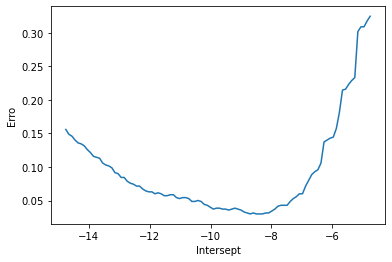

In [9]:
import numpy as np
import matplotlib.pyplot as plt

delta = 5
w = np.linspace(modelo.intercept_ - delta, modelo.intercept_ + delta, 100)

def z_function(w):    
    Erro = np.empty(w.shape)
    for j in range(Erro.shape[0]):
        modelo.intercept_ = w[j]
        ypred = modelo.predict(X)
        mse = mean_squared_error(y, ypred)
        Erro[j] = mse
    return Erro 

Erro = z_function(w)
plt.ylabel('Erro')
plt.xlabel('Intersept')
plt.plot(w, Erro)

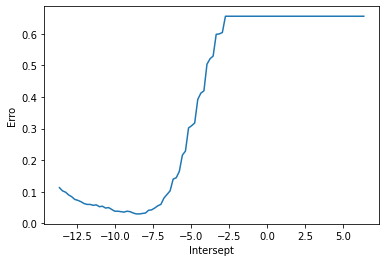

In [12]:
delta = 10
w = np.linspace(modelo.intercept_ - delta, modelo.intercept_ + delta, 100)

Erro = z_function(w)
plt.ylabel('Erro')
plt.xlabel('Intersept')
plt.plot(w, Erro)

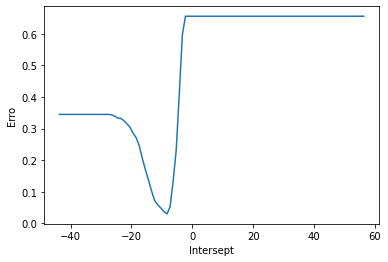

In [13]:
delta = 50
w = np.linspace(modelo.intercept_ - delta, modelo.intercept_ + delta, 100)

Erro = z_function(w)
plt.ylabel('Erro')
plt.xlabel('Intersept')
plt.plot(w, Erro)

Neste caso, com o problema de classificação é binário, há apenas um valor de intercept, e foram gerados 3 gráficos.